## Exploratory Data Analysis: houses over 650K

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
from sklearn.preprocessing import QuantileTransformer

import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
pd.set_option('max_columns', None)

pd.set_option('display.float_format', lambda x: '%0.4f' % x)

### Import dataset

In [2]:
df = pd.read_excel('Data/Data_MidTerm_Project_Real_State_Regression.xls')
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650,221900
1,6414100192,2014-12-09,3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639,538000
2,5631500400,2015-02-25,2,1.0000,770,10000,1.0000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062,180000
3,2487200875,2014-12-09,4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000,604000
4,1954400510,2015-02-18,3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.5000,1530,1131,3.0000,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.3460,1530,1509,360000
21593,6600060120,2015-02-23,4,2.5000,2310,5813,2.0000,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.3620,1830,7200,400000
21594,1523300141,2014-06-23,2,0.7500,1020,1350,2.0000,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.2990,1020,2007,402101
21595,291310100,2015-01-16,3,2.5000,1600,2388,2.0000,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.0690,1410,1287,400000


In [3]:
df["price650"] = df["price"] >= 650000
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,price650
0,7129300520,2014-10-13,3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650,221900,False
1,6414100192,2014-12-09,3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639,538000,False
2,5631500400,2015-02-25,2,1.0000,770,10000,1.0000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062,180000,False
3,2487200875,2014-12-09,4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000,604000,False
4,1954400510,2015-02-18,3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503,510000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.5000,1530,1131,3.0000,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.3460,1530,1509,360000,False
21593,6600060120,2015-02-23,4,2.5000,2310,5813,2.0000,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.3620,1830,7200,400000,False
21594,1523300141,2014-06-23,2,0.7500,1020,1350,2.0000,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.2990,1020,2007,402101,False
21595,291310100,2015-01-16,3,2.5000,1600,2388,2.0000,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.0690,1410,1287,400000,False


In [4]:
df = df[df['price650']]

In [44]:
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age_build,yr_renovated,lat,long,sqft_living15,sqft_lot15,price,quantile_zip,renov_yn
0,2015-02-23,3,2.0000,0.1067,5657,1.5000,0,2,4,8,1910,330,74,0,47.6621,-122.2700,2970,5657,1270000,10,0
1,2014-11-21,4,2.0000,0.2221,7051,2.0000,0,0,3,11,3700,0,9,0,47.5427,-121.9950,3580,6175,950000,3,0
2,2014-10-22,3,2.0000,0.1494,5467,2.0000,0,2,3,9,2780,0,15,0,47.5791,-122.3780,2630,5000,775000,2,0
3,2014-10-08,2,2.0000,0.1123,3313,2.0000,0,0,3,9,2310,0,9,0,47.6318,-122.3650,2700,5670,1250000,8,0
4,2015-03-11,5,3.0000,0.1842,5934,2.0000,0,0,3,9,3220,0,9,0,47.7076,-122.1010,3100,5934,798000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5317,2015-02-02,6,4.0000,0.3929,13928,2.0000,0,3,3,10,4150,1710,2,0,47.5382,-122.1140,5790,13928,1750000,9,0
5318,2014-05-20,4,2.0000,0.1320,12100,1.0000,0,0,4,8,1760,800,39,0,47.6310,-122.1080,2240,12100,765000,2,0
5319,2014-10-13,2,2.0000,0.0941,8112,1.0000,1,4,4,8,1040,1040,76,1984,47.7134,-122.2770,2030,8408,1190000,6,1
5320,2014-06-24,4,4.0000,0.1818,31450,2.0000,0,0,3,9,3190,0,5,0,47.5010,-121.9020,3000,72745,790000,7,0


In [45]:
df.waterfront.value_counts()

0    5188
1     134
Name: waterfront, dtype: int64

In [6]:
corr_650 = df.corr(method='spearman').abs()
corr_650

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,price650
id,1.0000,0.0120,0.0602,0.0767,0.1482,0.0242,0.0066,0.0179,0.0200,0.0646,0.0734,0.0114,0.0188,0.0054,0.0014,0.0284,0.0070,0.0308,0.1438,0.0755,NaN
bedrooms,0.0120,1.0000,0.4297,0.4753,0.1427,0.1761,0.0574,0.0265,0.0406,0.2196,0.3695,0.1542,0.1328,0.0202,0.1354,0.0640,0.1515,0.2452,0.1313,0.2267,NaN
bathrooms,0.0602,0.4297,1.0000,0.6991,0.1989,0.3960,0.0375,0.0964,0.2355,0.5509,0.5926,0.1523,0.4537,0.0522,0.1390,0.1019,0.2390,0.3720,0.1962,0.4049,NaN
sqft_living,0.0767,0.4753,0.6991,1.0000,0.4468,0.3623,0.0486,0.1360,0.2231,0.6959,0.8173,0.1958,0.4284,0.0240,0.2176,0.1392,0.3639,0.6177,0.4342,0.5331,NaN
sqft_lot,0.1482,0.1427,0.1989,0.4468,1.0000,0.0748,0.1153,0.1009,0.0297,0.3956,0.4339,0.0560,0.1679,0.0497,0.4365,0.1613,0.4779,0.5115,0.9306,0.2181,NaN
floors,0.0242,0.1761,0.3960,0.3623,0.0748,1.0000,0.0037,0.0923,0.3286,0.4369,0.6007,0.3627,0.4453,0.0087,0.0082,0.0350,0.1962,0.1983,0.0558,0.1608,NaN
waterfront,0.0066,0.0574,0.0375,0.0486,0.1153,0.0037,1.0000,0.3400,0.0070,0.0369,0.0131,0.0713,0.0415,0.0932,0.0646,0.0923,0.0524,0.0551,0.1249,0.1786,NaN
view,0.0179,0.0265,0.0964,0.1360,0.1009,0.0923,0.3400,1.0000,0.0613,0.1053,0.0376,0.3138,0.1208,0.1108,0.1567,0.1445,0.2109,0.1623,0.1012,0.2872,NaN
condition,0.0200,0.0406,0.2355,0.2231,0.0297,0.3286,0.0070,0.0613,1.0000,0.3130,0.3522,0.2360,0.5187,0.1163,0.0647,0.0028,0.2587,0.1630,0.0324,0.0155,NaN
grade,0.0646,0.2196,0.5509,0.6959,0.3956,0.4369,0.0369,0.1053,0.3130,1.0000,0.7207,0.0829,0.5122,0.0711,0.2286,0.1621,0.3636,0.6139,0.4124,0.5138,NaN


<AxesSubplot:>

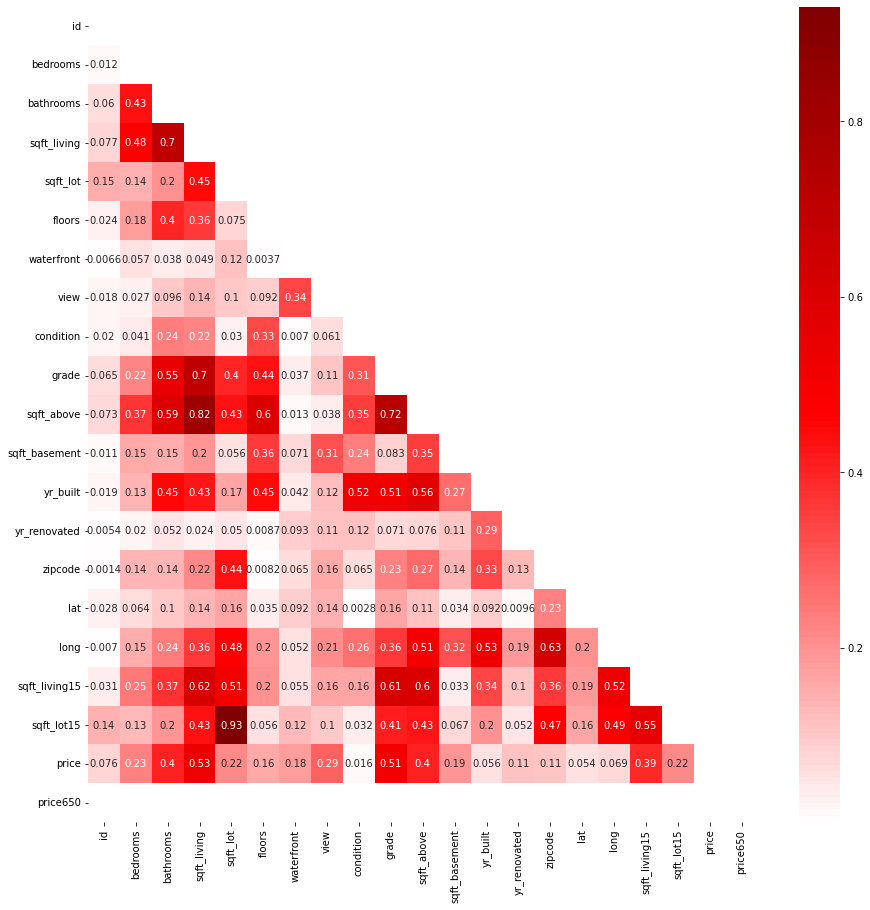

In [7]:
fig, ax = plt.subplots(figsize=(15,15))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr_650,
            cmap='seismic',
            mask=mask,
            center=0,
            annot=True,
            ax=ax)

In [8]:
df.price.describe()

count      5322.0000
mean     990965.0299
std      478187.3874
min      650000.0000
25%      725000.0000
50%      830000.0000
75%     1050000.0000
max     7700000.0000
Name: price, dtype: float64

<AxesSubplot:>

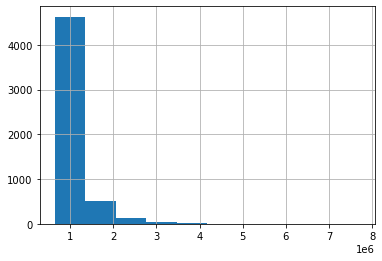

In [9]:
df.price.hist()

In [10]:
# df.price = np.log(df.price.values)

In [11]:
# df.price.hist()

### Columns type

### Drop not relevant columns

In [12]:
## df = df.drop(['id','lat', 'long', 'date', 'bedrooms', 'sqft_lot', 'floors', 'condition', 'sqft_above', 'sqft_basement', 'yr_renovated', 'sqft_living15', 'sqft_lot15'], axis=1)

### Checking Columns

In [13]:
## df = df.drop(15856).reset_index(drop=True)

In [14]:
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,price650
5,7237550310,2014-05-12,4,4.5000,5420,101930,1.0000,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.0050,4760,101930,1230000,True
10,1736800520,2015-04-03,3,2.5000,3560,9796,1.0000,0,0,3,8,1860,1700,1965,0,98007,47.6007,-122.1450,2210,8925,662500,True
15,9297300055,2015-01-24,4,3.0000,2950,5000,2.0000,0,3,3,9,1980,970,1979,0,98126,47.5714,-122.3750,2140,4000,650000,True
21,2524049179,2014-08-26,3,2.7500,3050,44867,1.0000,0,4,3,9,2330,720,1968,0,98040,47.5316,-122.2330,4110,20336,2000000,True
26,1794500383,2014-06-26,3,1.7500,2450,2691,2.0000,0,0,3,8,1750,700,1915,0,98119,47.6386,-122.3600,1760,3573,937000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21580,7502800100,2014-08-13,5,2.7500,3600,9437,2.0000,0,0,3,9,3600,0,2014,0,98059,47.4822,-122.1310,3550,9421,679950,True
21581,191100405,2015-04-21,4,3.2500,3410,10125,2.0000,0,0,3,10,3410,0,2007,0,98040,47.5653,-122.2230,2290,10125,1580000,True
21583,7202300110,2014-09-15,4,3.0000,3990,7838,2.0000,0,0,3,9,3990,0,2003,0,98053,47.6857,-122.0460,3370,6814,810000,True
21584,249000205,2014-10-15,5,3.7500,4470,8088,2.0000,0,0,3,11,4470,0,2008,0,98004,47.6321,-122.2000,2780,8964,1540000,True


In [15]:
df['bathrooms'].value_counts()

2.5000    1510
2.7500     534
3.5000     526
2.2500     465
1.7500     421
3.2500     397
3.0000     331
2.0000     300
1.0000     185
1.5000     167
3.7500     132
4.0000     117
4.5000      82
4.2500      74
4.7500      21
5.0000      17
5.2500      11
5.5000      10
6.0000       6
5.7500       3
6.7500       2
8.0000       2
0.7500       2
1.2500       2
6.2500       2
6.5000       2
7.7500       1
Name: bathrooms, dtype: int64

In [16]:
df['bathrooms'] = round(df['bathrooms'])
df['bathrooms'] = np.where(df['bathrooms'] == 0, 1, df['bathrooms'])
df['bathrooms'] = np.where(df['bathrooms'] > 5, 5, df['bathrooms'])
df

/var/folders/nx/7crq4wx155z00jtfy6fbs9bw0000gn/T/ipykernel_23255/1667658948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bathrooms'] = round(df['bathrooms'])
/var/folders/nx/7crq4wx155z00jtfy6fbs9bw0000gn/T/ipykernel_23255/1667658948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bathrooms'] = np.where(df['bathrooms'] == 0, 1, df['bathrooms'])
/var/folders/nx/7crq4wx155z00jtfy6fbs9bw0000gn/T/ipykernel_23255/1667658948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy o

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,price650
5,7237550310,2014-05-12,4,4.0000,5420,101930,1.0000,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.0050,4760,101930,1230000,True
10,1736800520,2015-04-03,3,2.0000,3560,9796,1.0000,0,0,3,8,1860,1700,1965,0,98007,47.6007,-122.1450,2210,8925,662500,True
15,9297300055,2015-01-24,4,3.0000,2950,5000,2.0000,0,3,3,9,1980,970,1979,0,98126,47.5714,-122.3750,2140,4000,650000,True
21,2524049179,2014-08-26,3,3.0000,3050,44867,1.0000,0,4,3,9,2330,720,1968,0,98040,47.5316,-122.2330,4110,20336,2000000,True
26,1794500383,2014-06-26,3,2.0000,2450,2691,2.0000,0,0,3,8,1750,700,1915,0,98119,47.6386,-122.3600,1760,3573,937000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21580,7502800100,2014-08-13,5,3.0000,3600,9437,2.0000,0,0,3,9,3600,0,2014,0,98059,47.4822,-122.1310,3550,9421,679950,True
21581,191100405,2015-04-21,4,3.0000,3410,10125,2.0000,0,0,3,10,3410,0,2007,0,98040,47.5653,-122.2230,2290,10125,1580000,True
21583,7202300110,2014-09-15,4,3.0000,3990,7838,2.0000,0,0,3,9,3990,0,2003,0,98053,47.6857,-122.0460,3370,6814,810000,True
21584,249000205,2014-10-15,5,4.0000,4470,8088,2.0000,0,0,3,11,4470,0,2008,0,98004,47.6321,-122.2000,2780,8964,1540000,True


## Data Cleaning

### Transform yr_built and yr_renovated

In [17]:
df['yr_built']= list(map(lambda x: 2015-x, df['yr_built']))

/var/folders/nx/7crq4wx155z00jtfy6fbs9bw0000gn/T/ipykernel_23255/3099508702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yr_built']= list(map(lambda x: 2015-x, df['yr_built']))


In [18]:
df['yr_built']

5         14
10        50
15        36
21        47
26       100
        ... 
21580      1
21581      8
21583     12
21584      7
21590      6
Name: yr_built, Length: 5322, dtype: int64

In [19]:
df.rename(columns = {'yr_built' : 'age_build'}, inplace=True)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [40]:
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age_build,yr_renovated,lat,long,sqft_living15,sqft_lot15,price,quantile_zip
0,2015-02-23,3,2.0000,0.1067,5657,1.5000,0,2,4,8,1910,330,74,0,47.6621,-122.2700,2970,5657,1270000,10
1,2014-11-21,4,2.0000,0.2221,7051,2.0000,0,0,3,11,3700,0,9,0,47.5427,-121.9950,3580,6175,950000,3
2,2014-10-22,3,2.0000,0.1494,5467,2.0000,0,2,3,9,2780,0,15,0,47.5791,-122.3780,2630,5000,775000,2
3,2014-10-08,2,2.0000,0.1123,3313,2.0000,0,0,3,9,2310,0,9,0,47.6318,-122.3650,2700,5670,1250000,8
4,2015-03-11,5,3.0000,0.1842,5934,2.0000,0,0,3,9,3220,0,9,0,47.7076,-122.1010,3100,5934,798000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5317,2015-02-02,6,4.0000,0.3929,13928,2.0000,0,3,3,10,4150,1710,2,0,47.5382,-122.1140,5790,13928,1750000,9
5318,2014-05-20,4,2.0000,0.1320,12100,1.0000,0,0,4,8,1760,800,39,0,47.6310,-122.1080,2240,12100,765000,2
5319,2014-10-13,2,2.0000,0.0941,8112,1.0000,1,4,4,8,1040,1040,76,1984,47.7134,-122.2770,2030,8408,1190000,6
5320,2014-06-24,4,4.0000,0.1818,31450,2.0000,0,0,3,9,3190,0,5,0,47.5010,-121.9020,3000,72745,790000,7


In [42]:
df['renov_yn'] = np.where(df.yr_renovated != 0, 1, 0)

In [43]:
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age_build,yr_renovated,lat,long,sqft_living15,sqft_lot15,price,quantile_zip,renov_yn
0,2015-02-23,3,2.0000,0.1067,5657,1.5000,0,2,4,8,1910,330,74,0,47.6621,-122.2700,2970,5657,1270000,10,0
1,2014-11-21,4,2.0000,0.2221,7051,2.0000,0,0,3,11,3700,0,9,0,47.5427,-121.9950,3580,6175,950000,3,0
2,2014-10-22,3,2.0000,0.1494,5467,2.0000,0,2,3,9,2780,0,15,0,47.5791,-122.3780,2630,5000,775000,2,0
3,2014-10-08,2,2.0000,0.1123,3313,2.0000,0,0,3,9,2310,0,9,0,47.6318,-122.3650,2700,5670,1250000,8,0
4,2015-03-11,5,3.0000,0.1842,5934,2.0000,0,0,3,9,3220,0,9,0,47.7076,-122.1010,3100,5934,798000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5317,2015-02-02,6,4.0000,0.3929,13928,2.0000,0,3,3,10,4150,1710,2,0,47.5382,-122.1140,5790,13928,1750000,9,0
5318,2014-05-20,4,2.0000,0.1320,12100,1.0000,0,0,4,8,1760,800,39,0,47.6310,-122.1080,2240,12100,765000,2,0
5319,2014-10-13,2,2.0000,0.0941,8112,1.0000,1,4,4,8,1040,1040,76,1984,47.7134,-122.2770,2030,8408,1190000,6,1
5320,2014-06-24,4,4.0000,0.1818,31450,2.0000,0,0,3,9,3190,0,5,0,47.5010,-121.9020,3000,72745,790000,7,0


### Transform zipcode

In [21]:
price_zip_mean = df.groupby(['zipcode'])['price'].mean()
price_zip_mean.sort_values(ascending=False)

zipcode
98039   2161300.0000
98004   1396656.6611
98112   1256294.3952
98040   1233758.0679
98102   1127675.3538
            ...     
98031    746533.3333
98010    737830.5556
98022    736714.2857
98133    713942.3571
98188    706500.0000
Name: price, Length: 63, dtype: float64

In [22]:
price_zip = df.groupby(['zipcode'])['price'].mean()
pz = price_zip.sort_values(ascending=False).reset_index()
pz

,zipcode,price
0,98039,2161300.0000
1,98004,1396656.6611
2,98112,1256294.3952
3,98040,1233758.0679
4,98102,1127675.3538
...,...,...
58,98031,746533.3333
59,98010,737830.5556
60,98022,736714.2857
61,98133,713942.3571


In [23]:
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age_build,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,price650
5,7237550310,2014-05-12,4,4.0000,5420,101930,1.0000,0,0,3,11,3890,1530,14,0,98053,47.6561,-122.0050,4760,101930,1230000,True
10,1736800520,2015-04-03,3,2.0000,3560,9796,1.0000,0,0,3,8,1860,1700,50,0,98007,47.6007,-122.1450,2210,8925,662500,True
15,9297300055,2015-01-24,4,3.0000,2950,5000,2.0000,0,3,3,9,1980,970,36,0,98126,47.5714,-122.3750,2140,4000,650000,True
21,2524049179,2014-08-26,3,3.0000,3050,44867,1.0000,0,4,3,9,2330,720,47,0,98040,47.5316,-122.2330,4110,20336,2000000,True
26,1794500383,2014-06-26,3,2.0000,2450,2691,2.0000,0,0,3,8,1750,700,100,0,98119,47.6386,-122.3600,1760,3573,937000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21580,7502800100,2014-08-13,5,3.0000,3600,9437,2.0000,0,0,3,9,3600,0,1,0,98059,47.4822,-122.1310,3550,9421,679950,True
21581,191100405,2015-04-21,4,3.0000,3410,10125,2.0000,0,0,3,10,3410,0,8,0,98040,47.5653,-122.2230,2290,10125,1580000,True
21583,7202300110,2014-09-15,4,3.0000,3990,7838,2.0000,0,0,3,9,3990,0,12,0,98053,47.6857,-122.0460,3370,6814,810000,True
21584,249000205,2014-10-15,5,4.0000,4470,8088,2.0000,0,0,3,11,4470,0,7,0,98004,47.6321,-122.2000,2780,8964,1540000,True


In [24]:
Q1 = np.percentile(pz['price'], 10)
Q2 = np.percentile(pz['price'], 20)
Q3 = np.percentile(pz['price'], 30)
Q4 = np.percentile(pz['price'], 40)
Q5 = np.percentile(pz['price'], 50)
Q6 = np.percentile(pz['price'], 60)
Q7 = np.percentile(pz['price'], 70)
Q8 = np.percentile(pz['price'], 80)
Q9 = np.percentile(pz['price'], 90)

In [25]:
pz['quantile_zip'] = "1"
pz['quantile_zip'] = np.where(pz['price'] >= Q1, "2", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q2, "3", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q3, "4", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q4, "5", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q5, "6", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q6, "7", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q7, "8", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q8, "9", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q9, "10", pz['quantile_zip'])

In [26]:
pz

,zipcode,price,quantile_zip
0,98039,2161300.0000,10
1,98004,1396656.6611,10
2,98112,1256294.3952,10
3,98040,1233758.0679,10
4,98102,1127675.3538,10
...,...,...,...
58,98031,746533.3333,1
59,98010,737830.5556,1
60,98022,736714.2857,1
61,98133,713942.3571,1


In [27]:
pz.groupby('quantile_zip').count()

,zipcode,price
quantile_zip,,
1,7,7
10,7,7
2,6,6
3,6,6
4,6,6
5,6,6
6,7,7
7,6,6
8,6,6


In [28]:
df = pd.merge(df, pz[['zipcode', 'quantile_zip']], on='zipcode', how='inner').sample(frac=1).reset_index(drop=True)

In [29]:
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age_build,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,price650,quantile_zip
0,4218400175,2015-02-23,3,2.0000,2240,5657,1.5000,0,2,4,8,1910,330,74,0,98105,47.6621,-122.2700,2970,5657,1270000,True,10
1,3629921000,2014-11-21,4,2.0000,3700,7051,2.0000,0,0,3,11,3700,0,9,0,98029,47.5427,-121.9950,3580,6175,950000,True,3
2,9577800005,2014-10-22,3,2.0000,2780,5467,2.0000,0,2,3,9,2780,0,15,0,98126,47.5791,-122.3780,2630,5000,775000,True,2
3,1732801300,2014-10-08,2,2.0000,2310,3313,2.0000,0,0,3,9,2310,0,9,0,98119,47.6318,-122.3650,2700,5670,1250000,True,8
4,2568200170,2015-03-11,5,3.0000,3220,5934,2.0000,0,0,3,9,3220,0,9,0,98052,47.7076,-122.1010,3100,5934,798000,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5317,715010130,2015-02-02,6,4.0000,5860,13928,2.0000,0,3,3,10,4150,1710,2,0,98006,47.5382,-122.1140,5790,13928,1750000,True,9
5318,2525059077,2014-05-20,4,2.0000,2560,12100,1.0000,0,0,4,8,1760,800,39,0,98052,47.6310,-122.1080,2240,12100,765000,True,2
5319,7352200025,2014-10-13,2,2.0000,2080,8112,1.0000,1,4,4,8,1040,1040,76,1984,98125,47.7134,-122.2770,2030,8408,1190000,True,6
5320,323079065,2014-06-24,4,4.0000,3190,31450,2.0000,0,0,3,9,3190,0,5,0,98027,47.5010,-121.9020,3000,72745,790000,True,7


In [30]:
scaler = MinMaxScaler()
df['sqft_living'] = scaler.fit_transform(df[['sqft_living']])

In [31]:
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age_build,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,price650,quantile_zip
0,4218400175,2015-02-23,3,2.0000,0.1067,5657,1.5000,0,2,4,8,1910,330,74,0,98105,47.6621,-122.2700,2970,5657,1270000,True,10
1,3629921000,2014-11-21,4,2.0000,0.2221,7051,2.0000,0,0,3,11,3700,0,9,0,98029,47.5427,-121.9950,3580,6175,950000,True,3
2,9577800005,2014-10-22,3,2.0000,0.1494,5467,2.0000,0,2,3,9,2780,0,15,0,98126,47.5791,-122.3780,2630,5000,775000,True,2
3,1732801300,2014-10-08,2,2.0000,0.1123,3313,2.0000,0,0,3,9,2310,0,9,0,98119,47.6318,-122.3650,2700,5670,1250000,True,8
4,2568200170,2015-03-11,5,3.0000,0.1842,5934,2.0000,0,0,3,9,3220,0,9,0,98052,47.7076,-122.1010,3100,5934,798000,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5317,715010130,2015-02-02,6,4.0000,0.3929,13928,2.0000,0,3,3,10,4150,1710,2,0,98006,47.5382,-122.1140,5790,13928,1750000,True,9
5318,2525059077,2014-05-20,4,2.0000,0.1320,12100,1.0000,0,0,4,8,1760,800,39,0,98052,47.6310,-122.1080,2240,12100,765000,True,2
5319,7352200025,2014-10-13,2,2.0000,0.0941,8112,1.0000,1,4,4,8,1040,1040,76,1984,98125,47.7134,-122.2770,2030,8408,1190000,True,6
5320,323079065,2014-06-24,4,4.0000,0.1818,31450,2.0000,0,0,3,9,3190,0,5,0,98027,47.5010,-121.9020,3000,72745,790000,True,7


In [32]:
df = df.drop(['id','price650', 'zipcode'], axis=1)

In [33]:
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age_build,yr_renovated,lat,long,sqft_living15,sqft_lot15,price,quantile_zip
0,2015-02-23,3,2.0000,0.1067,5657,1.5000,0,2,4,8,1910,330,74,0,47.6621,-122.2700,2970,5657,1270000,10
1,2014-11-21,4,2.0000,0.2221,7051,2.0000,0,0,3,11,3700,0,9,0,47.5427,-121.9950,3580,6175,950000,3
2,2014-10-22,3,2.0000,0.1494,5467,2.0000,0,2,3,9,2780,0,15,0,47.5791,-122.3780,2630,5000,775000,2
3,2014-10-08,2,2.0000,0.1123,3313,2.0000,0,0,3,9,2310,0,9,0,47.6318,-122.3650,2700,5670,1250000,8
4,2015-03-11,5,3.0000,0.1842,5934,2.0000,0,0,3,9,3220,0,9,0,47.7076,-122.1010,3100,5934,798000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5317,2015-02-02,6,4.0000,0.3929,13928,2.0000,0,3,3,10,4150,1710,2,0,47.5382,-122.1140,5790,13928,1750000,9
5318,2014-05-20,4,2.0000,0.1320,12100,1.0000,0,0,4,8,1760,800,39,0,47.6310,-122.1080,2240,12100,765000,2
5319,2014-10-13,2,2.0000,0.0941,8112,1.0000,1,4,4,8,1040,1040,76,1984,47.7134,-122.2770,2030,8408,1190000,6
5320,2014-06-24,4,4.0000,0.1818,31450,2.0000,0,0,3,9,3190,0,5,0,47.5010,-121.9020,3000,72745,790000,7


In [34]:
## rechecking corr after cleaning 

In [35]:
corr_650_clean = df.corr(method='spearman').abs()
corr_650_clean

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age_build,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
bedrooms,1.0000,0.4128,0.4753,0.1427,0.1761,0.0574,0.0265,0.0406,0.2196,0.3695,0.1542,0.1328,0.0202,0.0640,0.1515,0.2452,0.1313,0.2267
bathrooms,0.4128,1.0000,0.6175,0.1453,0.2901,0.0376,0.1153,0.1676,0.4491,0.4790,0.2189,0.3307,0.0665,0.1060,0.1353,0.2956,0.1391,0.3939
sqft_living,0.4753,0.6175,1.0000,0.4468,0.3623,0.0486,0.1360,0.2231,0.6959,0.8173,0.1958,0.4284,0.0240,0.1392,0.3639,0.6177,0.4342,0.5331
sqft_lot,0.1427,0.1453,0.4468,1.0000,0.0748,0.1153,0.1009,0.0297,0.3956,0.4339,0.0560,0.1679,0.0497,0.1613,0.4779,0.5115,0.9306,0.2181
floors,0.1761,0.2901,0.3623,0.0748,1.0000,0.0037,0.0923,0.3286,0.4369,0.6007,0.3627,0.4453,0.0087,0.0350,0.1962,0.1983,0.0558,0.1608
waterfront,0.0574,0.0376,0.0486,0.1153,0.0037,1.0000,0.3400,0.0070,0.0369,0.0131,0.0713,0.0415,0.0932,0.0923,0.0524,0.0551,0.1249,0.1786
view,0.0265,0.1153,0.1360,0.1009,0.0923,0.3400,1.0000,0.0613,0.1053,0.0376,0.3138,0.1208,0.1108,0.1445,0.2109,0.1623,0.1012,0.2872
condition,0.0406,0.1676,0.2231,0.0297,0.3286,0.0070,0.0613,1.0000,0.3130,0.3522,0.2360,0.5187,0.1163,0.0028,0.2587,0.1630,0.0324,0.0155
grade,0.2196,0.4491,0.6959,0.3956,0.4369,0.0369,0.1053,0.3130,1.0000,0.7207,0.0829,0.5122,0.0711,0.1621,0.3636,0.6139,0.4124,0.5138
sqft_above,0.3695,0.4790,0.8173,0.4339,0.6007,0.0131,0.0376,0.3522,0.7207,1.0000,0.3527,0.5615,0.0762,0.1104,0.5092,0.5975,0.4291,0.4012


<AxesSubplot:>

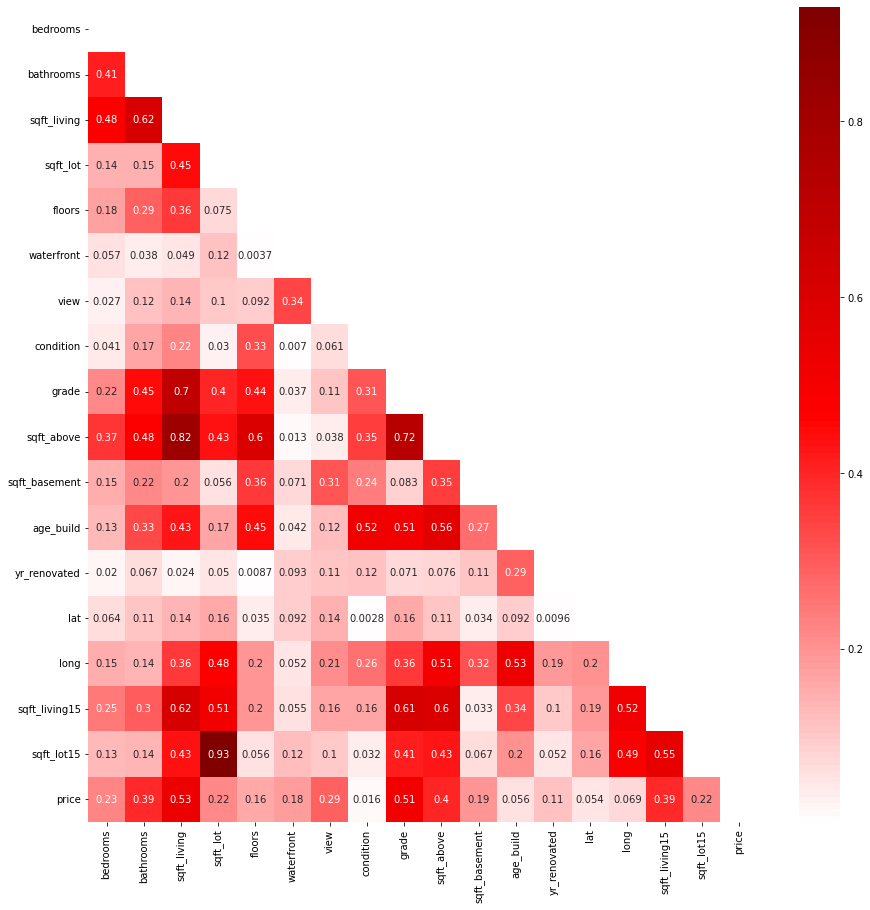

In [38]:
fig, ax = plt.subplots(figsize=(15,15))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr_650_clean,
            cmap='seismic',
            mask=mask,
            center=0,
            annot=True,
            ax=ax)

In [39]:
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age_build,yr_renovated,lat,long,sqft_living15,sqft_lot15,price,quantile_zip
0,2015-02-23,3,2.0000,0.1067,5657,1.5000,0,2,4,8,1910,330,74,0,47.6621,-122.2700,2970,5657,1270000,10
1,2014-11-21,4,2.0000,0.2221,7051,2.0000,0,0,3,11,3700,0,9,0,47.5427,-121.9950,3580,6175,950000,3
2,2014-10-22,3,2.0000,0.1494,5467,2.0000,0,2,3,9,2780,0,15,0,47.5791,-122.3780,2630,5000,775000,2
3,2014-10-08,2,2.0000,0.1123,3313,2.0000,0,0,3,9,2310,0,9,0,47.6318,-122.3650,2700,5670,1250000,8
4,2015-03-11,5,3.0000,0.1842,5934,2.0000,0,0,3,9,3220,0,9,0,47.7076,-122.1010,3100,5934,798000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5317,2015-02-02,6,4.0000,0.3929,13928,2.0000,0,3,3,10,4150,1710,2,0,47.5382,-122.1140,5790,13928,1750000,9
5318,2014-05-20,4,2.0000,0.1320,12100,1.0000,0,0,4,8,1760,800,39,0,47.6310,-122.1080,2240,12100,765000,2
5319,2014-10-13,2,2.0000,0.0941,8112,1.0000,1,4,4,8,1040,1040,76,1984,47.7134,-122.2770,2030,8408,1190000,6
5320,2014-06-24,4,4.0000,0.1818,31450,2.0000,0,0,3,9,3190,0,5,0,47.5010,-121.9020,3000,72745,790000,7


conclusions: after filtering only the expensive houses, features - incl. those found to be informative for the original df, emerge as uninformative. Hence, linear regression would probably be worse.

In [37]:
df.to_excel("over650.xlsx")

## Linear Regression (trial 5) - did not run!

#### XY Split

In [54]:
X5=df.drop('price', axis=1)
X5
y5=df.price
y5

0       1310000
1        754999
2        710000
3       1950000
4        750000
         ...   
5317    1860000
5318     682000
5319     760000
5320     698000
5321     710000
Name: price, Length: 5322, dtype: int64

In [55]:
X5

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age_build,yr_renovated,lat,long,sqft_living15,sqft_lot15,price650,quantile_zip
0,9273200140,2015-01-21,2,2.0000,0.2419,3938,2.0000,0,4,3,10,2910,1040,24,0,47.5912,-122.3840,3220,4500,True,6
1,6705850300,2015-04-14,4,2.0000,0.1676,9323,2.0000,0,0,3,10,3010,0,23,0,47.5780,-122.0530,2840,8413,True,5
2,8691300500,2014-10-28,4,2.0000,0.1573,12349,2.0000,0,0,3,10,2880,0,19,0,47.5879,-121.9730,3490,11539,True,5
3,3760500280,2014-10-14,3,2.0000,0.1281,12779,1.5000,0,4,3,10,2510,0,47,0,47.6982,-122.2310,2810,12225,True,9
4,8928100025,2015-03-24,4,2.0000,0.0838,6300,1.5000,0,1,3,7,1650,300,71,0,47.6819,-122.2710,1760,6300,True,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5317,9471200065,2014-10-15,5,3.0000,0.3700,9600,2.0000,0,0,5,9,3860,1710,63,0,47.6708,-122.2620,3170,10400,True,10
5318,7300200400,2014-11-05,4,2.0000,0.1233,34092,2.0000,0,0,4,8,2450,0,35,0,47.5751,-122.0490,2410,35378,True,5
5319,6752510010,2014-08-05,4,2.0000,0.1605,7901,2.0000,0,0,3,9,2920,0,11,0,47.7036,-122.1250,3020,7900,True,2
5320,1725059209,2014-09-29,6,2.0000,0.1415,11250,1.0000,0,0,5,7,1340,1340,48,0,47.6553,-122.1900,2200,9875,True,8


In [56]:
df.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'age_build', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'price650', 'quantile_zip'],
      dtype='object')

#### Data Splitting

In [57]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=.30,random_state=123)

#### Standardize

In [58]:
std_scaler5 = StandardScaler().fit(X_train5) 

X_train_scaled5 = std_scaler5.transform(X_train5)

TypeError: The DTypes <class 'numpy.dtype[datetime64]'> and <class 'numpy.dtype[int64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

In [ ]:
X_test_scaled5 = std_scaler5.transform(X_test5)

In [ ]:
print(X_train_scaled5)
print("--------")
print(X_test_scaled5)

In [ ]:
X_train_const_scaled5 = sm.add_constant(X_train_scaled5) 

model5 = sm.OLS(y_train5, X_train_const_scaled5).fit()
predictions_train5 = model5.predict(X_train_const_scaled5) 

X_test_const_scaled5 = sm.add_constant(X_test_scaled5) 
predictions_test5 = model5.predict(X_test_const_scaled5) 
print_model5 = model5.summary()
print(print_model5)

#### Model validation

In [ ]:
#using sklearn
model5=LinearRegression()    # model
model5.fit(X_train_scaled5, y_train5)   # model train

In [ ]:
model5.coef_ #gives you per column the slope (alpha)

In [ ]:
model5.intercept_ #gives the optimal slope

In [ ]:
R2_test5 = model5.score(X_test_scaled5,y_test5) # measure R2
R2_test5

In [ ]:
# Making prediction
y_pred5 = model5.predict(X_test_scaled5)
y_pred5

In [ ]:
y_test5

In [ ]:
result=pd.DataFrame({"y_test":y_test5,"y_pred":y_pred5})

In [ ]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred5, y_test5, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test5 - y_pred5)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred5,y_test5 - y_pred5,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred5,np.zeros(len(y_pred5)),linestyle='dashed')

In [ ]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

#### Error metrics

In [ ]:
print(mse(y_test5,y_pred5))
print(mae(y_test5,y_pred5))

#### Features Importance

In [ ]:
features_importances5 = pd.DataFrame(data={
    'Attribute': X_train5.columns,
    'Importance': abs(model5.coef_)
})
features_importances5 = features_importances5.sort_values(by='Importance', ascending=False)
features_importances5